___
# PROJETO 1

## Warlen César Rodrigues Filho

## Como o acesso à internet tem evoluído ao longo dos últimos 5 anos.

___
## Introdução

Pretendo analisar, entre os anos de 2011 e 2015, a situação da rede de saneamento básico das regiões Nordeste e Sudeste do país e relacionar as condições de vida com a renda dos domicílios.

Para isso utilizarei as variáveis:

- V0219 - Forma de iluminação do domicílio
- V0218 - Destino do lixo domiciliar
- V0217 - Forma de escoamento do banheiro ou sanitário
- V0211 - Tem água canalizada em pelo menos um cômodo do domicílio
- UF - Unidade de Federação
- V0224 - Tem filtro d'água
- V4621 - Renda domiciliar per capita

___
## Análise e Resultados

In [14]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [15]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\dell\Documents\GitHub\CDAgoraVai\Projeto 1


In [16]:
#Carregando base de dados
dados11 = pd.read_csv('DOM2011.csv', sep= ',')
dados15 = pd.read_csv('DOM2015.csv', sep= ',')
dados11 = dados11[dados11.V4621 < 999999999999]
dados11 = dados11[dados11.V4621 < 999999999999]
dados11.dropna = (["V0219"], ["V0218"], ["V0211"], ["V0217"], ["V0224"], ["V4621"])
dados15.dropna = (["V0219"], ["V0218"], ["V0211"], ["V0217"], ["V0224"], ["V4621"])

In [17]:
#Separando Regiões
dados11["REGIAO"]='x'
dados11.loc[(dados11['UF'] >=10) & (dados11['UF'] < 20),'REGIAO'] = 'Norte'
dados11.loc[(dados11['UF'] >=20) & (dados11['UF'] < 30),'REGIAO'] = 'Nordeste'
dados11.loc[(dados11['UF'] >=30) & (dados11['UF'] < 40),'REGIAO'] = 'Sudeste'
dados11.loc[(dados11['UF'] >=40) & (dados11['UF'] < 50),'REGIAO'] = 'Sul'
dados11.loc[(dados11['UF'] >=50) & (dados11['UF'] < 60),'REGIAO'] = 'Centro-Oeste'

dados15["REGIAO"]='x'
dados15.loc[(dados15['UF'] >=10) & (dados15['UF'] < 20),'REGIAO'] = 'Norte'
dados15.loc[(dados15['UF'] >=20) & (dados15['UF'] < 30),'REGIAO'] = 'Nordeste'
dados15.loc[(dados15['UF'] >=30) & (dados15['UF'] < 40),'REGIAO'] = 'Sudeste'
dados15.loc[(dados15['UF'] >=40) & (dados15['UF'] < 50),'REGIAO'] = 'Sul'
dados15.loc[(dados15['UF'] >=50) & (dados15['UF'] < 60),'REGIAO'] = 'Centro-Oeste'

#V0211
dados11.V0211 = dados11.V0211.astype('category')
dados11.V0211.cat.categories = ('Sim', 'Não')

dados15.V0211 = dados15.V0211.astype('category')
dados15.V0211.cat.categories = ('Sim', 'Não')
#-----------------------------------------------------------------------------------------------------------------------------------

#V0217
dados11.V0217 = dados11.V0217.astype('category')
dados11.V0217.cat.categories = ('Rede coletora de esgoto ou pluvial', 'Fossa séptica ligada a rede coletora de esgoto ou pluvial',
                               'Fossa séptica não ligada a rede coletora de esgoto ou pluvial', 'Fossa rudimentar', 'Vala', 'Direto para o rio, lago ou mar',
                               'Outra forma')

dados15.V0217 = dados15.V0217.astype('category')
dados15.V0217.cat.categories = ('Rede coletora de esgoto ou pluvial', 'Fossa séptica ligada a rede coletora de esgoto ou pluvial',
                               'Fossa séptica não ligada a rede coletora de esgoto ou pluvial', 'Fossa rudimentar', 'Vala', 'Direto para o rio, lago ou mar',
                               'Outra forma')
#-------------------------------------------------------------------------------------------------------------------------

#V0219
dados11.V0219 = dados11.V0219.astype('category')
dados11.V0219.cat.categories = ('Elétrica (de rede, gerador, solar)', 'Óleo, querosene ou gás de botijão', 'Outra forma')

dados15.V0219 = dados15.V0219.astype('category')
dados15.V0219.cat.categories = ('Elétrica (de rede, gerador, solar)', 'Óleo, querosene ou gás de botijão', 'Outra forma')
#-------------------------------------------------------------------------------------------------------------------------

#V0218
dados11.V0218 = dados11.V0218.astype('category')
dados11.V0218.cat.categories = ('Coletado diretamente', 'Coletado indiretamente', 'Queimado ou enterrado na propriedade',
                                'Jogado em terreno baldio ou logradouro', 'Jogado em rio, lago ou mar', 'Outro destino')

dados15.V0218 = dados15.V0218.astype('category')
dados15.V0218.cat.categories = ('Coletado diretamente', 'Coletado indiretamente', 'Queimado ou enterrado na propriedade',
                                'Jogado em terreno baldio ou logradouro', 'Jogado em rio, lago ou mar', 'Outro destino')
#------------------------------------------------------------------------------------------------------------------------
#V0224

dados11.V0224 = dados11.V0224.astype('category')
dados11.V0224.cat.categories = ('Sim', 'Não')

dados15.V0224 = dados15.V0224.astype('category')
dados15.V0224.cat.categories = ('Sim', 'Não')

#Pegando as Regiões de interesse.
dados11nordeste = dados11[dados11.REGIAO == "Nordeste"]
dados15nordeste = dados15[dados15.REGIAO == "Nordeste"]
dados11sudeste = dados11[dados11.REGIAO == "Sudeste"]
dados15sudeste = dados15[dados15.REGIAO == "Sudeste"]

### Iniciando as análises

##### Comparando as situações financeiras dos domicílios das regiões Sudeste e Nordeste em 2011

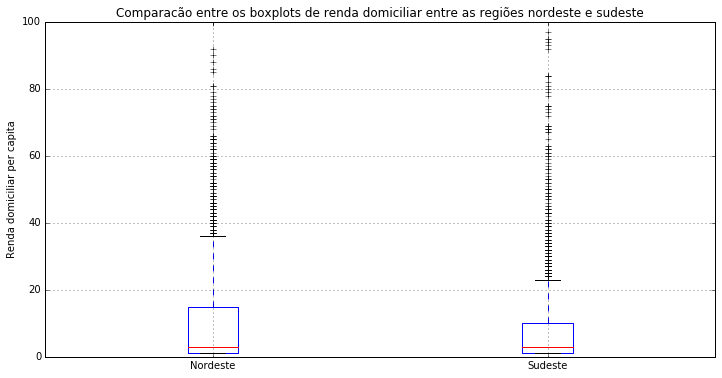

In [18]:
dici_renda_domicilio = {'Nordeste':dados11nordeste.V4621.value_counts(), 'Sudeste': dados11sudeste.V4621.value_counts()}
para_rendas =  pd.DataFrame.from_dict(data=dici_renda_domicilio)
para_rendas.plot.box(figsize=(12,6), legend= True, grid = True, title= 'Comparacão entre os boxplots de renda domiciliar entre as regiões nordeste e sudeste' )
axes = plt.gca()
axes.set_ylim([0,100])
plt.ylabel('Renda domiciliar per capita')
plt.show()

Podemos inferir que a região Nordeste possui, em média, uma renda domiciliar per capita maior que a do Sudeste. Os boxplots nos permitem assumir que a região nordeste é mais desigual que a região sudeste. 

##### Dados de Água Encanada

In [19]:
cross1 = pd.crosstab(dados11.REGIAO, dados11.V0211)
cross1

V0211,Sim,Não
REGIAO,,
Centro-Oeste,11568,225
Nordeste,26450,3582
Norte,12483,2321
Sudeste,30841,372
Sul,18098,148


In [20]:
cross2 = pd.crosstab(dados15.REGIAO, dados15.V0211)
cross2

V0211,Sim,Não
REGIAO,,
Centro-Oeste,12351,168
Nordeste,29584,2991
Norte,15225,1559
Sudeste,35862,375
Sul,19376,110


Tendo em mente os dois CrossTabs acima referentes aos anos de 2011 e 2015 respectivamente, podemos perceber que há um aumento (percentual e absoluto) significativo de domicílios com água canalizada na região nordeste. Na região sudeste pode-se analisar o mesmo, porém não é um crescimento tão gritante quanto o analisado na região nordeste.

#### Analisando a rede coletora de esgoto

Dados do ano de 2011

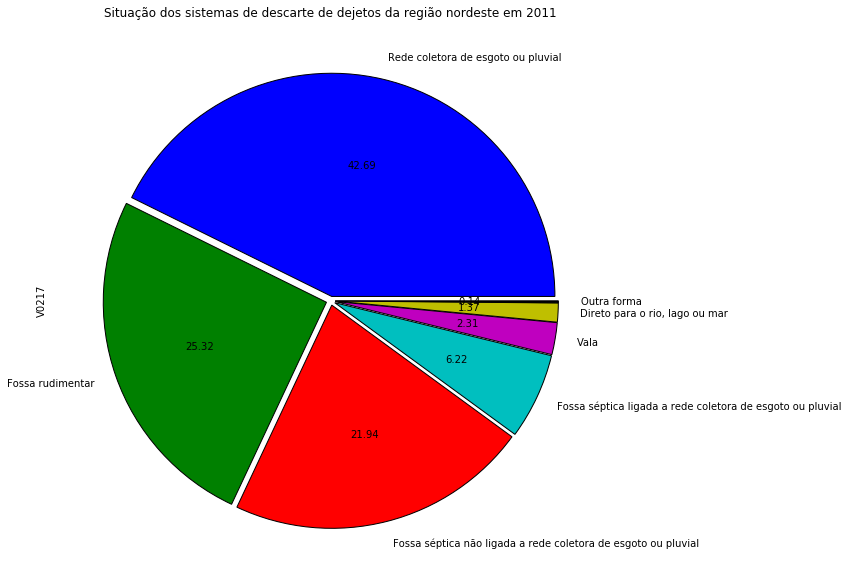

In [21]:
dados11nordeste.V0217.value_counts().plot(kind='pie', figsize = (10,10), autopct='%0.2f', explode = [0.02,0.02,0.02,0.02,0.02,0.02,0.02], title='Situação dos sistemas de descarte de dejetos da região nordeste em 2011')

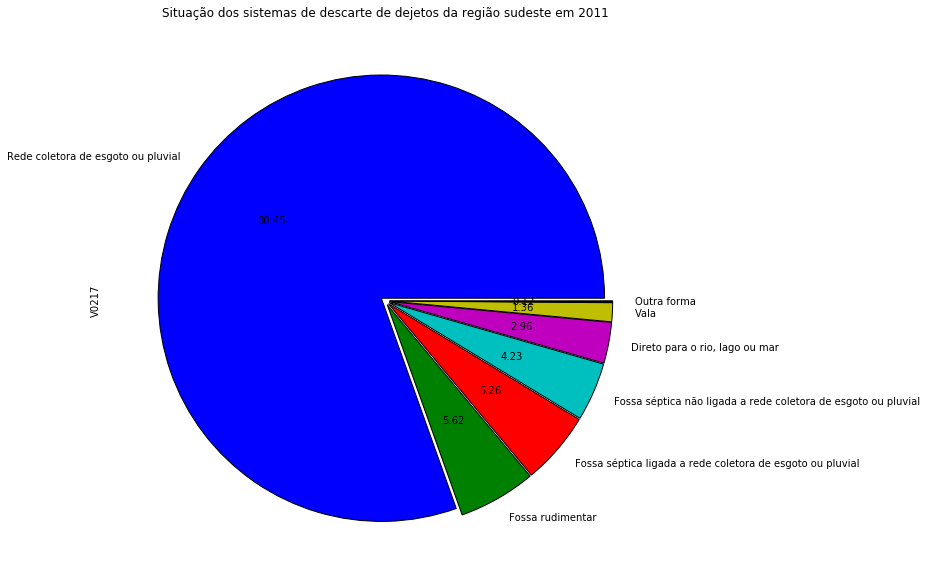

In [22]:
dados11sudeste.V0217.value_counts().plot(kind='pie', figsize = (10,10), autopct='%0.2f', explode = [0.02,0.02,0.02,0.02,0.02,0.02,0.02], title='Situação dos sistemas de descarte de dejetos da região sudeste em 2011')

Dados do ano de 2015

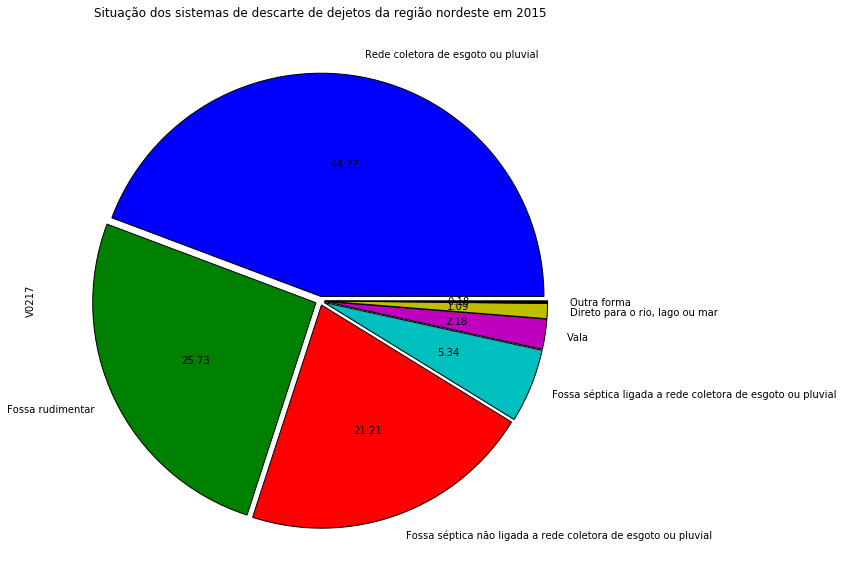

In [23]:
dados15nordeste.V0217.value_counts().plot(kind='pie', figsize = (10,10), autopct='%0.2f', explode = [0.02,0.02,0.02,0.02,0.02,0.02,0.02], title='Situação dos sistemas de descarte de dejetos da região nordeste em 2015')

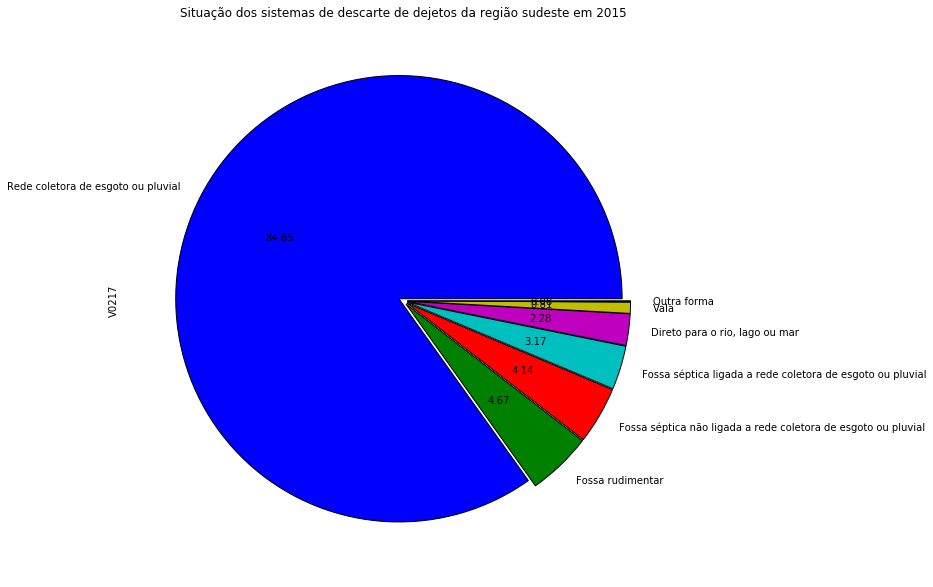

In [24]:
dados15sudeste.V0217.value_counts().plot(kind='pie', figsize = (10,10), autopct='%0.2f', explode = [0.02,0.02,0.02,0.02,0.02,0.02,0.02], title='Situação dos sistemas de descarte de dejetos da região sudeste em 2015')

##### Analisando o fornecimento de energia

Dados de 2011

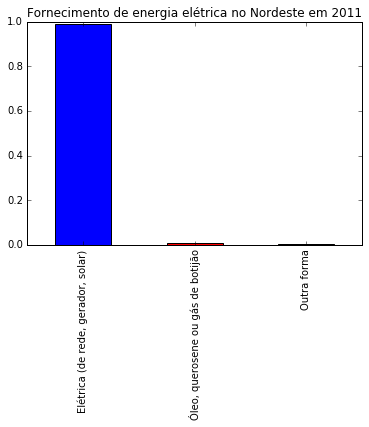

In [25]:
dados11nordeste.V0219.value_counts(True).plot(kind='bar', color=('blue', 'red', 'yellow'), legend=False, title = 'Fornecimento de energia elétrica no Nordeste em 2011')

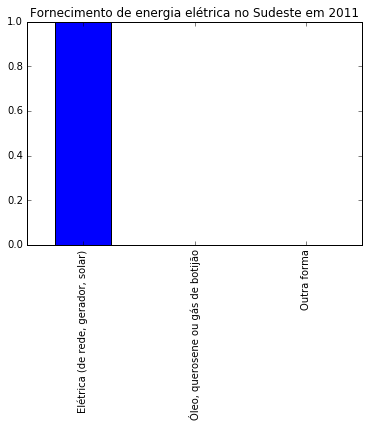

In [26]:
dados11sudeste.V0219.value_counts(True).plot(kind='bar', color=('blue', 'red', 'yellow'), legend=False,  title = 'Fornecimento de energia elétrica no Sudeste em 2011')

Dados de 2015

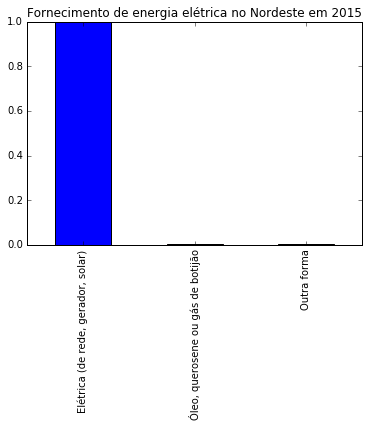

In [27]:
dados15nordeste.V0219.value_counts(True).plot(kind='bar', color=('blue', 'red', 'yellow'), legend=False, title = 'Fornecimento de energia elétrica no Nordeste em 2015')

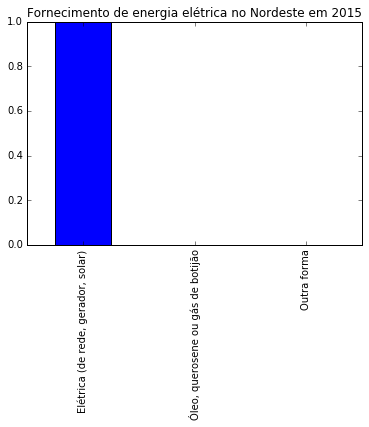

In [28]:
dados15sudeste.V0219.value_counts(True).plot(kind='bar', color=('blue', 'red', 'yellow'), legend=False, title = 'Fornecimento de energia elétrica no Nordeste em 2015')

Comparando os anos de 2011 e 2015, podemos ver que o sistema de distribuição de energia na região sudeste atende praticamente todos os habitantes da região. A região nordeste, embora já atendesse quase sua população total teve uma evolução, o que indica melhora nos serviços prestados às regiões mais pobres e/ou isoladas.

##### Presença de água purificada via filtro nas casas

Dados de 2011

In [29]:
cross_agua = pd.crosstab(dados11.REGIAO, dados11.V0224)
cross_agua

V0224,Sim,Não
REGIAO,,
Centro-Oeste,7457,4336
Nordeste,15243,14789
Norte,4581,10223
Sudeste,21422,9791
Sul,4199,14047


Dados de 2015

In [30]:
cross_agua15 = pd.crosstab(dados15.REGIAO, dados15.V0224)
cross_agua15

V0224,Sim,Não
REGIAO,,
Centro-Oeste,7700,4819
Nordeste,14830,17745
Norte,5097,11687
Sudeste,25862,10375
Sul,5256,14230


Podemos analisar que o número de domicílios que utilizam filtros para purificar água é relativamente menor que no ano de 2011. Isso nos permite inferir que a qualidade do serviço de distribuição de água melhorou, assim como a qualidade dá água.

##### Análise de renda para o ano de 2015

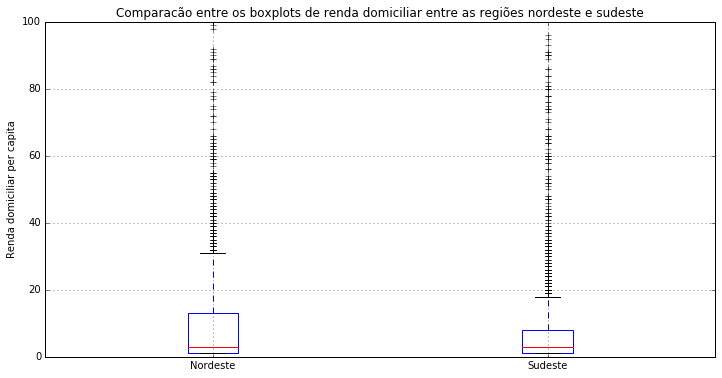

In [31]:
dici_renda_domicilio = {'Nordeste':dados15nordeste.V4621.value_counts(), 'Sudeste': dados1sudeste.V4621.value_counts()}
para_rendas =  pd.DataFrame.from_dict(data=dici_renda_domicilio)
para_rendas.plot.box(figsize=(12,6), legend= True, grid = True, title= 'Comparacão entre os boxplots de renda domiciliar entre as regiões nordeste e sudeste' )
axes = plt.gca()
axes.set_ylim([0,100])
plt.ylabel('Renda domiciliar per capita')
plt.show()

___
## Conclusão 

Como visto nos gráficos e CrossTabs gerados acima, é perceptível que a qualidade de vida do nordestino melhorou consideravelmenente do ano de 2011 ao ano de 2015. Já no sudeste, a qualidade nos serviços se manteve boa, visto que a demanda aumentou e os indicadores continuaram altos. Levando em consideração que a renda da grande maioria dos habitantes das duas regiões se manteve no mesmo padrão, podemos inferir que as mudanças partiram das políticas aplicadas nas empresas prestadoras de serviços. Serviços como sistema de coleta de esgoto e fornecimento de energia, hoje, chegam às pessoas que antes não tinham acesso.